In [117]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests 
import time
import re
import seaborn as sns
from locale import atof
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# WEB Scraping

In [2]:
url = "https://www.cars.com/shopping/results/?list_price_max=&makes[]=porsche&maximum_distance=all&models[]=porsche-911&sort=year&stock_type=cpo&zip="
requests.get(url)
html = requests.get(url).content
soup = bs(html)

In [3]:
# model test scraping from web

model = soup.find_all("div", {"class" :"vehicle-card"})
#model[0].find("h2").get_text()
#model[0].find("div", {"class":"mileage"}).get_text()
#model[0].find("div",{"class":"price-section price-section-vehicle-card"}).get_text()
#model[0].find("span",{"class":"sds-rating__count"}).get_text()
#model[0].find("span",{"class":"sds-rating__link sds-button-link"}).get_text()

In [4]:
name = []
mileage = []
price = []
rating = []
review = []

for info_tech in model:
    #name
    name.append(info_tech.find("h2").get_text())
#print(name)
    
    #mileage
    mileage.append(info_tech.find("div", {"class":"mileage"}).get_text())
#print(mileage)    
    
    #price
    price.append(info_tech.find("span",{"class":"primary-price"}).get_text())
#print(price)
    
    #rating
    rating.append(info_tech.find("span",{"class":"sds-rating__count"}).get_text())
#print(rating)
    
    #review
    review.append(info_tech.find("span",{"class":"sds-rating__link sds-button-link"}).get_text())
#print(review)

In [5]:
# test data

df = pd.DataFrame({"Name":name,"Mileage": mileage ,"Price":price,"Rating":rating, "Review": review})
df

,Name,Mileage,Price,Rating,Review
0,2017 Porsche 911 Turbo S,"26,709 mi.","$168,882",3.7,(31 reviews)
1,2011 Porsche 911 Turbo S,"8,603 mi.","$135,995",4.8,(347 reviews)
2,2011 Porsche 911 Carrera GTS,"22,711 mi.","$91,991",4.9,(743 reviews)
3,2011 Porsche 911 GT3 RS 4.0,"12,762 mi.","$979,000",4.8,(48 reviews)
4,2011 Porsche 911 Carrera 4S,"49,624 mi.","$79,881",5.0,(303 reviews)
5,2011 Porsche 911 Turbo S,"2,930 mi.","$179,000",4.8,(48 reviews)
6,2011 Porsche 911 Turbo,"3,576 mi.","$137,900",4.7,(313 reviews)
7,2011 Porsche 911 Carrera GTS,"23,726 mi.","$102,500",4.4,(72 reviews)
8,2012 Porsche 911 Carrera Black Edition,"18,834 mi.","$76,898",4.2,(68 reviews)
9,2012 Porsche 911 Turbo,"24,971 mi.","$119,991",4.8,(504 reviews)


In [6]:
# Full data scraping from web

name = []
mileage = []
price = []
rating = []
review = []


for x in range(1,35):
    web = f"https://www.cars.com/shopping/results/?page={x}&page_size=20&list_price_max=&makes[]=porsche&maximum_distance=all&models[]=porsche-911&sort=year&stock_type=cpo&zip="
    requests.get(web)
    html = requests.get(web).content
    soup = bs(html)
    time.sleep(0.5)
    
    model = soup.find_all("div", {"class" :"vehicle-card"})
    
    for info_tech in model:
        #name
        name.append(info_tech.find("h2").get_text())
        #print(name)
    
        #mileage
        mileage.append(info_tech.find("div", {"class":"mileage"}).get_text())
        #print(mileage)    
    
        #price
        price.append(info_tech.find("span",{"class":"primary-price"}).get_text())
        #print(price)

In [8]:
df = pd.DataFrame({"Name":name,"Mileage": mileage ,"Price":price})

# Data Cleaning

In [9]:
df["Year"] = df["Name"].str[0:4]
df["Year"] = df["Year"].astype(int)

In [119]:
df.drop_duplicates(inplace=True)

In [11]:
df["Name"] = df["Name"].str.replace("\d{4}|\w{7}","", regex= True)
df.head()

,Name,Mileage,Price,Year
0,911 Turbo S,"26,709 mi.","$168,882",2017
1,911 Turbo S,"8,603 mi.","$135,995",2011
2,911 GTS,"22,711 mi.","$91,991",2011
3,911 GT3 RS 4.0,"12,762 mi.","$979,000",2011
4,911 4S,"49,624 mi.","$79,881",2011


In [30]:
# Filtering missing values
df.loc[df.Price == 'Not Priced'].index

Int64Index([583, 618, 639], dtype='int64')

In [31]:
df.drop(index=[583, 618, 639], inplace = True)

In [17]:
# converting Mileage from object in int 
df["Mileage"] = df["Mileage"].str.replace(" mi.","", regex= True)
df["Mileage"] = df["Mileage"].str.replace(",",".")
df["Mileage"] = df.Mileage.astype(float)

In [39]:
# converting Price from object in int

df["Price"]=df["Price"].str.replace("$","", regex= True)
df["Price"]=df["Price"].str.replace(",",".", regex= True).astype(int)
df.Price = df.Price.astype(int)

In [40]:
df.Price.nlargest()

3      979000
77     499900
280    429991
298    425000
295    419950
Name: Price, dtype: int64

In [37]:
df.Price = df.Price*1000

In [41]:
df.head()

,Name,Mileage,Price,Year
0,911 Turbo S,26.709,168882,2017
1,911 Turbo S,8.603,135995,2011
2,911 GTS,22.711,91991,2011
3,911 GT3 RS 4.0,12.762,979000,2011
4,911 4S,49.624,79881,2011


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 676
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     674 non-null    object 
 1   Mileage  674 non-null    float64
 2   Price    674 non-null    int64  
 3   Year     674 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 42.5+ KB


In [120]:
# Breaking year models by generation

model_label = [] 
for i in df["Year"]:
    if i in [2010,2011]:
        model_label.append("997.2")
    elif i in [2012,2013,2014,2015]:
        model_label.append("991")
    elif i in [2016,2017,2018]:
        model_label.append("991.2")
    elif i in [2019,2020,2021,2022]:
        model_label.append("992")
    else:
        model_label.append("problem")

In [69]:
# Append new column

df["Model_type"] = model_label

In [50]:
# Cleaning Name 

df.Name = df.Name.str.strip()

In [ ]:
df.loc[df.Name == "911 er"]

In [53]:
df.Name[df.Name.str.startswith('911  50 Years  Design')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911  50 Years  Design')]]
df.Name[df.Name.str.startswith('911 er')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911 er')]]
df.Name[df.Name.str.startswith('911  T')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911  T')]]
df.Name[df.Name.str.startswith('911 GT3 RS 4.0')] = [i.replace(i,"911 GT3 RS") for i in df.Name[df.Name.str.startswith('911 GT3 RS 4.0')]]
df.Name[df.Name.str.startswith('911  Black')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911  Black')]]
df.Name[df.Name.str.startswith('911  4')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911  4')]]
df.Name[df.Name.str.startswith('911 50th sary')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911 50th sary')]]
df.Name[df.Name.str.startswith('911 Targa 4')] = [i.replace(i,"911 Targa 4S") for i in df.Name[df.Name.str.startswith('911 Targa 4')]]
df.Name[df.Name.str.startswith('911 R')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911 R')]]

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_3250/1253498023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Name[df.Name.str.startswith('911  50 Years  Design')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911  50 Years  Design')]]
/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_3250/1253498023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Name[df.Name.str.startswith('911 er')] = [i.replace(i,"911") for i in df.Name[df.Name.str.startswith('911 er')]]
/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_3250/1253498023.py:3: SettingWithCopyWarning: 
A va

In [54]:
df.Name.unique()

array(['911 Turbo S', '911  GTS', '911 GT3 RS', '911', '911 Turbo',
       '911  S', '911 Targa 4S', '911 GT3', '911 4 GTS', '911 GT2 RS'],
      dtype=object)

In [55]:
# Breaking down models for groups 

sport= []
for i in df.Name:
    if i in ["911","911  S","911 Targa 4S","911 4S"]:
        sport.append("Classic")
    elif i in ["911 Turbo S","911 Turbo"]:
        sport.append("Sport")
    elif i in ['911 GT3 RS', '911  GTS', '911 GT3','911 4 GTS','911 GT2 RS']:
        sport.append("Super Sport")
    else:
        sport.append("Problem")
#print(sport)

In [56]:
# Append new column

df["Sport"] = sport

# Vizualisation 

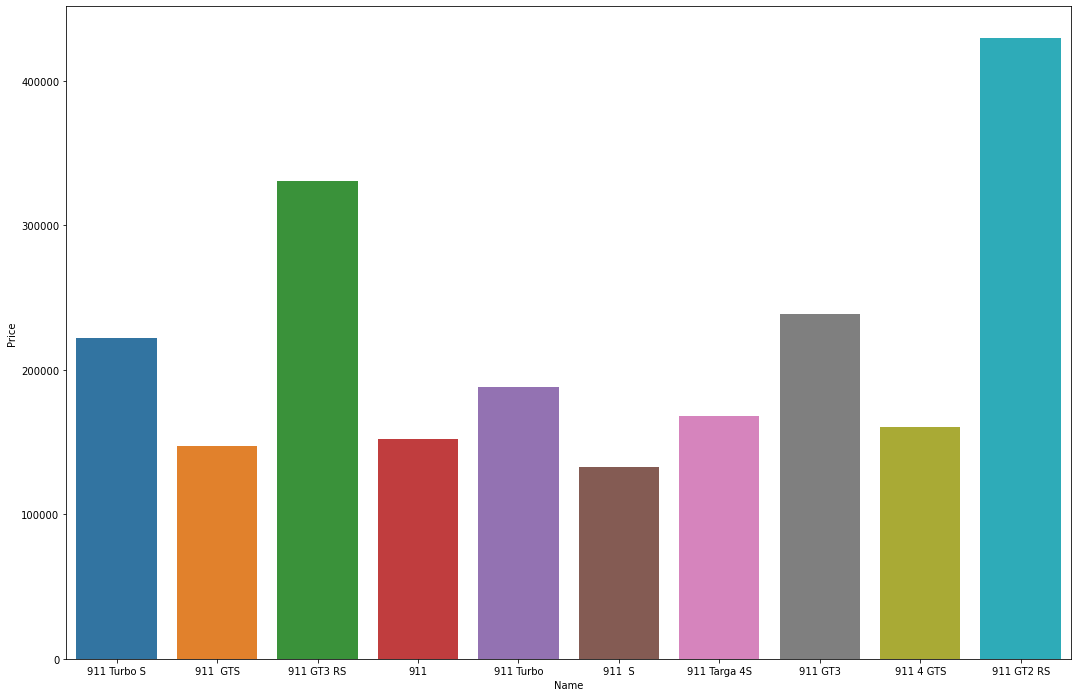

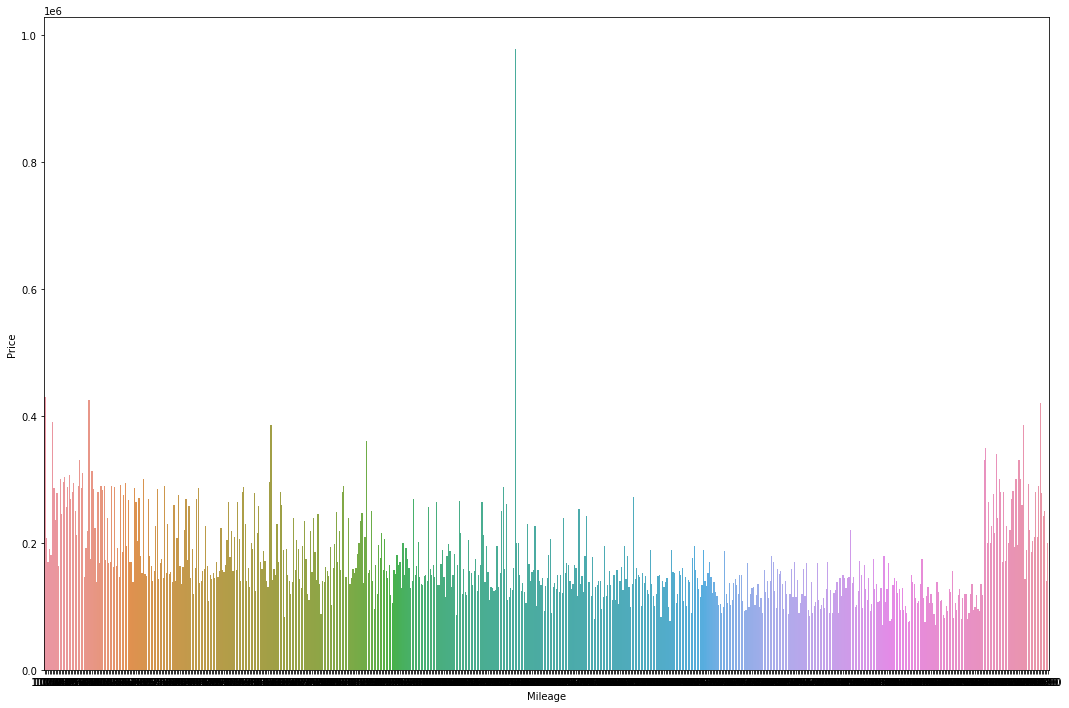

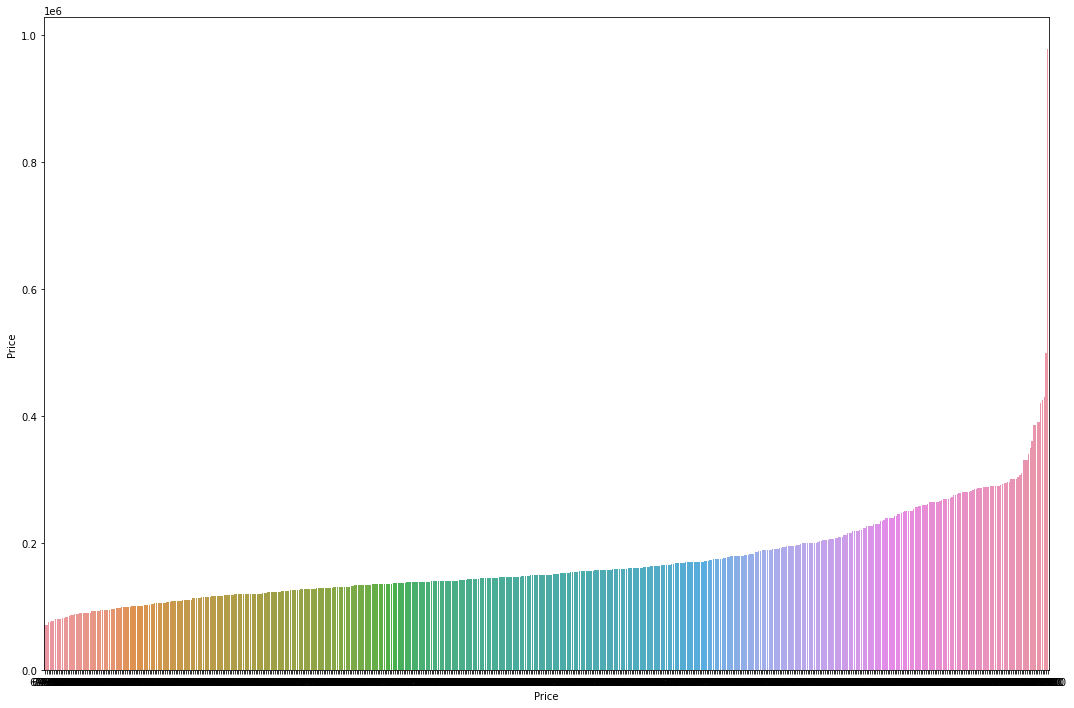

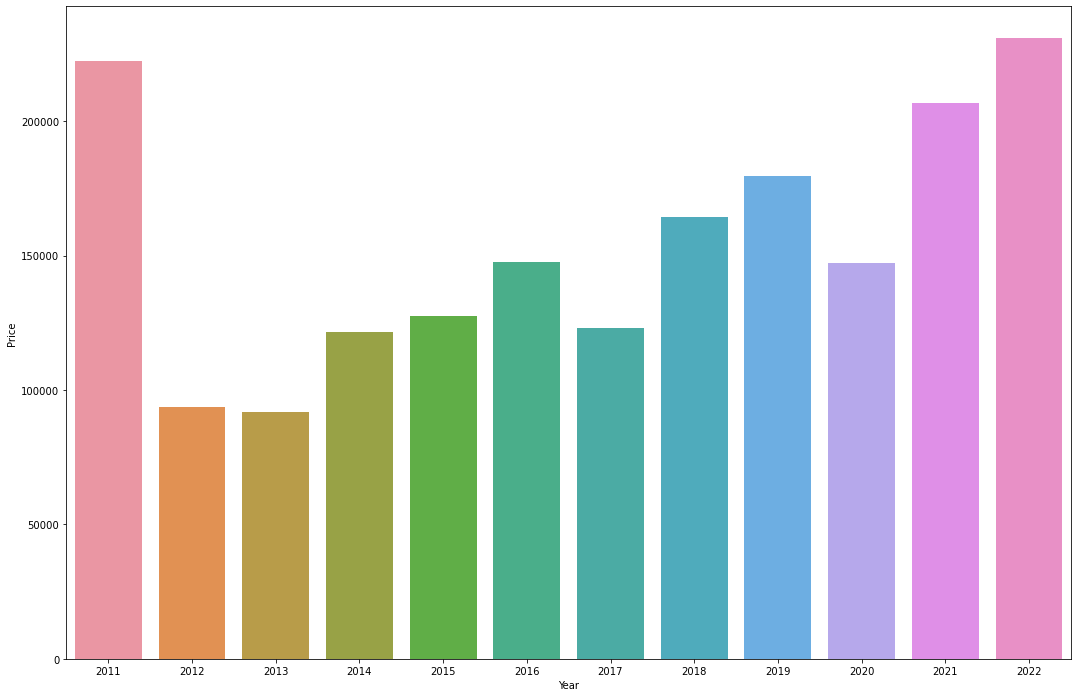

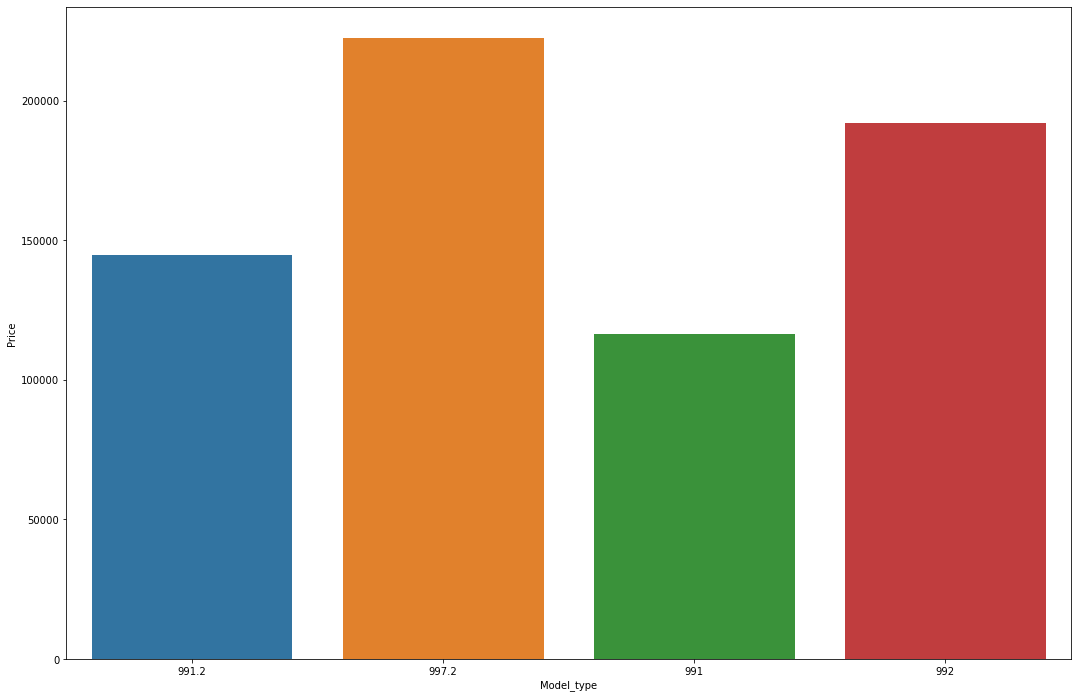

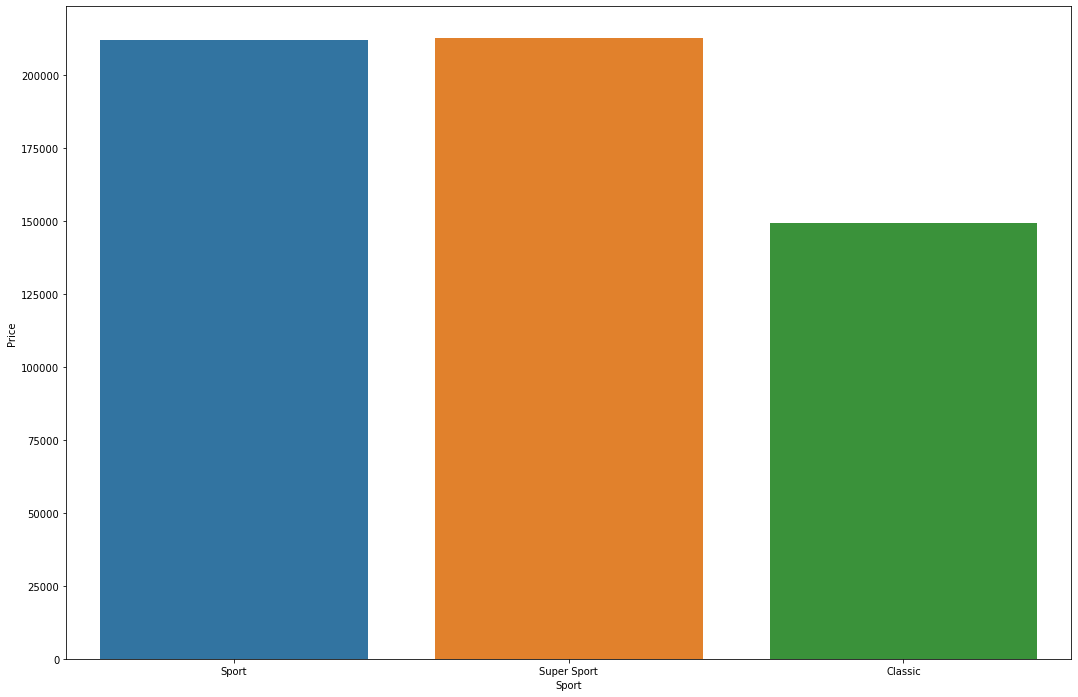

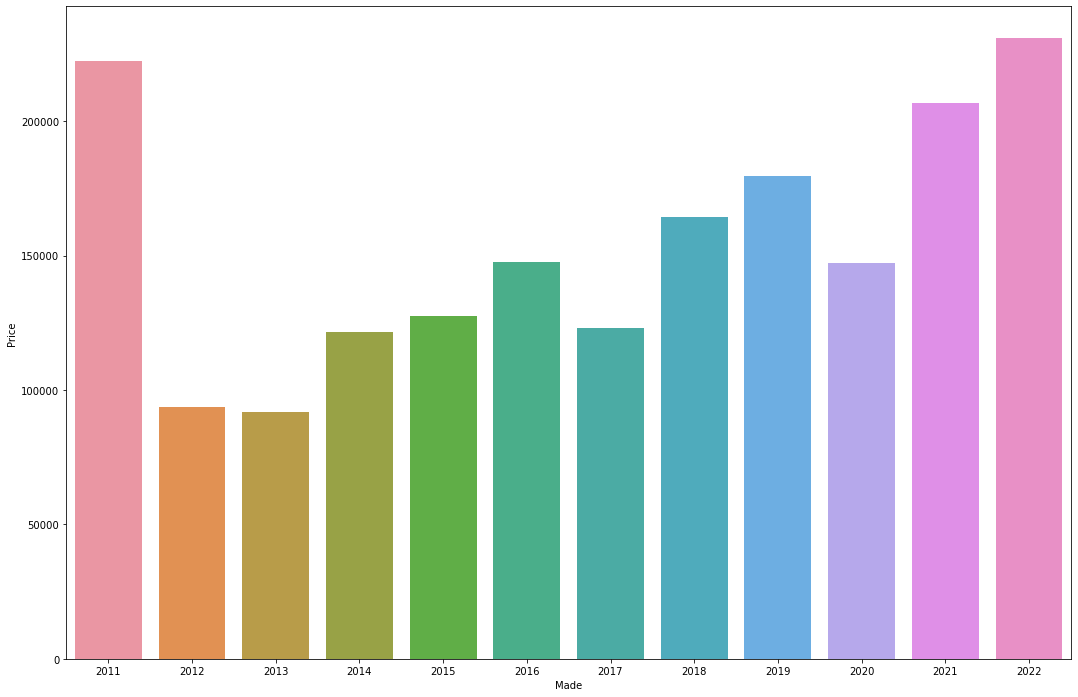

In [80]:
for i in df:
    plt.figure(figsize= (18,12))
    sns.barplot(data = df, x = i, y= "Price", ci= None)
    plt.show()

In [62]:
for i in df:
    boxp = px.box(data_frame=df, x=i, y= "Price")
    boxp.show()

<Figure size 720x720 with 0 Axes>

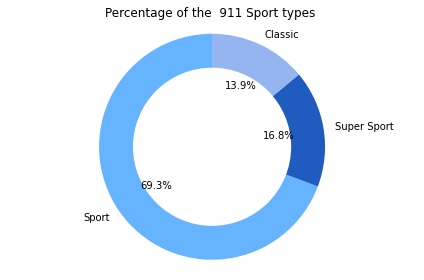

In [63]:
labels = df['Sport'].unique()
sizes =  df['Sport'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
fig = plt.gcf()
fig.set_size_inches(10,10)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of the  911 Sport types ",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

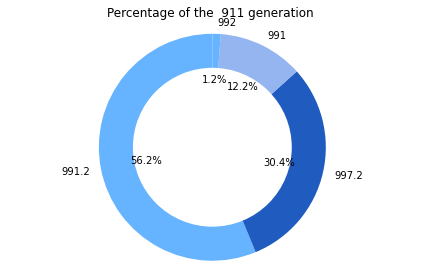

In [111]:
labels = df['Model_type'].unique()
sizes =  df['Model_type'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
fig = plt.gcf()
fig.set_size_inches(10,10)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of the  911 generation ",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [110]:
usa = []
for i in df.Name:
    if i in ["911","911  S","911 Targa 4S","911 4S"]:
        usa.append("USA")
    elif i in ["911 Turbo S","911 Turbo"]:
        usa.append("USA")
    elif i in ['911 GT3 RS', '911  GTS', '911 GT3','911 4 GTS','911 GT2 RS']:
        usa.append("USA")
    else:
        usa.append("Problem")
#usa

In [91]:
df["Made"] = usa

In [121]:
#df.loc[df.Model_type == "991.2"]

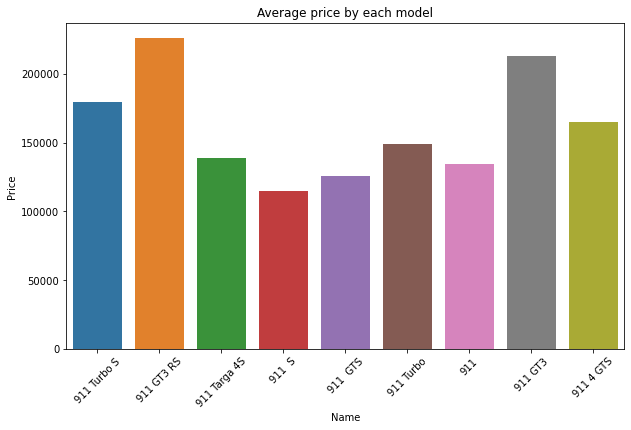

In [125]:
#Since this group takes up more than 50% of the data as a percentage.
#I wanted to look at the price for each model

plt.figure(figsize=(10,6))
sns.barplot(data = df.loc[df.Model_type == "991.2"], x = "Name", y = "Price", ci = None)
plt.xticks(rotation = 45)
plt.title("Average price by each model")
plt.show()

In [126]:
#df.loc[df.Sport == "Sport"]

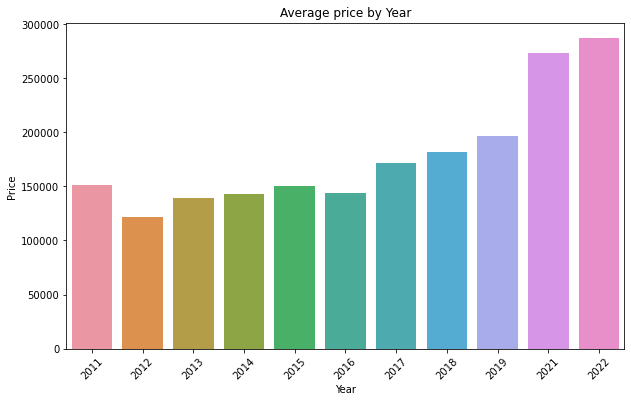

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(data = df.loc[df.Sport == "Sport"], x = "Year", y = "Price", ci = None)
plt.xticks(rotation = 45)
plt.title("Average price by Year for")
plt.show()

In [90]:
df.to_csv("porsche.csv")